In [32]:
import re

# Initialize empty arrays
time = []
phaseAx = []
phaseBx = []
phaseCx = []
phaseA = []
phaseB = []
phaseC = []
pwmA = []
pwmB = []
pwmC = []  
countA = []
countB = []
countC = []

# Regex pattern
pattern = r"time:\s*(\d+),\s*phaseAx:\s*(-?\d+)\s*,\s*phaseBx:\s*(-?\d+),\s*phaseCx:\s*(-?\d+),\s*phaseA:\s*(\d),\s*phaseB:\s*(\d),\s*phaseC:\s*(\d),\s*pwmA:\s*(\d),\s*pwmB:\s*(\d),\s*pwmC:\s*(\d),\s*countA:\s*(\d),\s*countB:\s*(\d),\s*countC:\s*(\d)"

# Read and parse the file
with open("C:\\Users\\herna\\Downloads\\research\\oscillator\\three_phase_shape.txt", "r") as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            t, ax, bx, cx, a, b, c, pa, pb, pc, ac, bc, cc = match.groups()
            time.append(int(t))
            phaseAx.append(int(ax))
            phaseBx.append(int(bx))
            phaseCx.append(int(cx))
            phaseA.append(int(a))
            phaseB.append(int(b))
            phaseC.append(int(c))
            pwmA.append(int(pa))
            pwmB.append(int(pb))
            pwmC.append(int(pc))
            countA.append(int(ac))
            countB.append(int(bc))
            countC.append(int(cc))


In [33]:
import numpy as np 
import matplotlib as plt
np_time = np.array(time)
ns_time = np_time/(1e12)
ts = 5e-9
dt = 100e-12 # time step

print(int(ts/dt))

50


[0.0000000e+00 1.0000000e-10 2.0000000e-10 ... 9.9884397e-03 9.9884398e-03
 9.9884399e-03]


c:\Users\herna\Downloads\research\oscillator\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


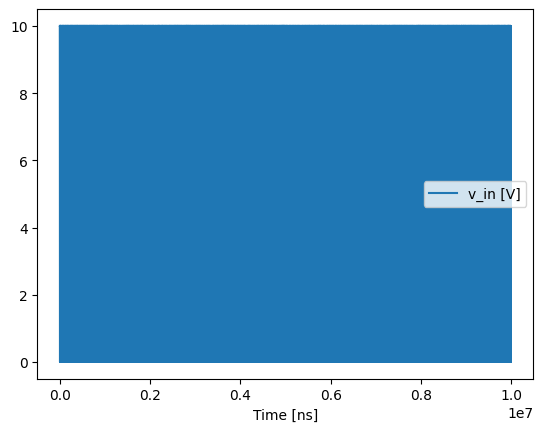

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R = 1.0      # Ohms
L = 1e-3      # Henries
C = 20e-12     # Farads
dt = 1e-10    # 100 ps

# Digital input sampled at 5 ns
T_sample = 5e-9
v_input_coarse = np.array(phaseA)  
upsample_factor = int(T_sample / dt)
v_input = 10*(np.repeat(v_input_coarse, upsample_factor))

# Arrays
N = len(v_input)
i_RL = np.zeros(N)
i_C  = np.zeros(N)
i_s  = np.zeros(N)

# Time stepping
for n in range(1, N):
    # R-L branch current
    di = ((v_input[n]) - R*i_RL[n-1]) * (dt/L)
    i_RL[n] = i_RL[n-1] + di
    
    # Capacitor current
    dv = (v_input[n] - v_input[n-1]) / dt
    i_C[n] = C * dv
    
    # Source current
    i_s[n] = i_RL[n] + i_C[n]

t = np.arange(N)*dt
print(t)
plt.plot(t*1e9, v_input, label="v_in [V]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()


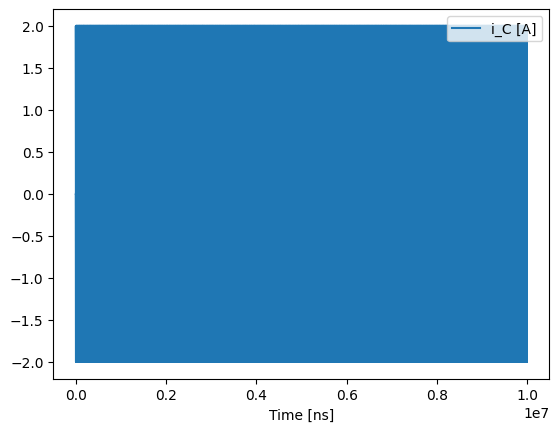

In [35]:
plt.plot(t*1e9, i_C, label="i_C [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()

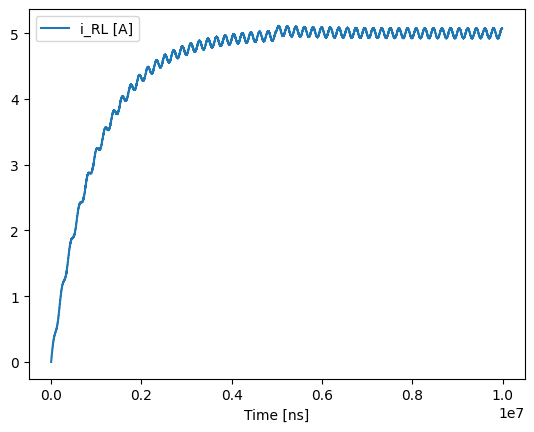

In [36]:
plt.plot(t*1e9, i_RL, label="i_RL [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()

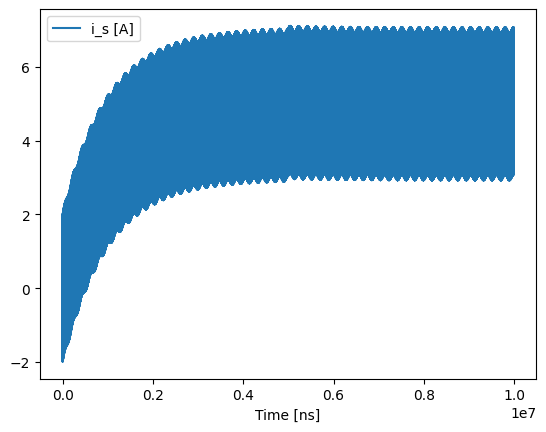

In [37]:
plt.plot(t*1e9, i_s, label="i_s [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()

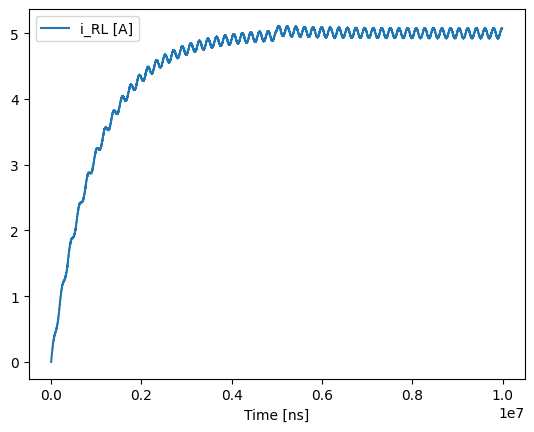

In [39]:
T_sample = 5e-9
v_input_coarse = np.array(countA)  
upsample_factor = int(T_sample / dt)
v_input = 10*(np.repeat(v_input_coarse, upsample_factor))

# Arrays
N = len(v_input)
i_RL = np.zeros(N)
i_C  = np.zeros(N)
i_s  = np.zeros(N)

# Time stepping
for n in range(1, N):
    # R-L branch current
    di = ((v_input[n]) - R*i_RL[n-1]) * (dt/L)
    i_RL[n] = i_RL[n-1] + di
    
    # Capacitor current
    dv = (v_input[n] - v_input[n-1]) / dt
    i_C[n] = C * dv
    
    # Source current
    i_s[n] = i_RL[n] + i_C[n]

t = np.arange(N)*dt
plt.plot(t*1e9, i_RL, label="i_RL [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()


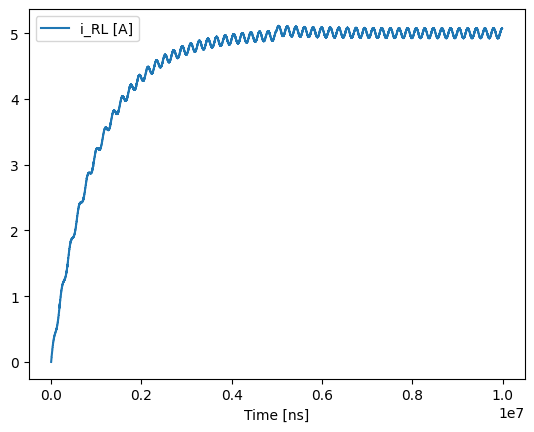

In [40]:
T_sample = 5e-9
v_input_coarse = np.array(pwmA)  
upsample_factor = int(T_sample / dt)
v_input = 10*(np.repeat(v_input_coarse, upsample_factor))

# Arrays
N = len(v_input)
i_RL = np.zeros(N)
i_C  = np.zeros(N)
i_s  = np.zeros(N)

# Time stepping
for n in range(1, N):
    # R-L branch current
    di = ((v_input[n]) - R*i_RL[n-1]) * (dt/L)
    i_RL[n] = i_RL[n-1] + di
    
    # Capacitor current
    dv = (v_input[n] - v_input[n-1]) / dt
    i_C[n] = C * dv
    
    # Source current
    i_s[n] = i_RL[n] + i_C[n]

t = np.arange(N)*dt
plt.plot(t*1e9, i_RL, label="i_RL [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()


c:\Users\herna\Downloads\research\oscillator\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


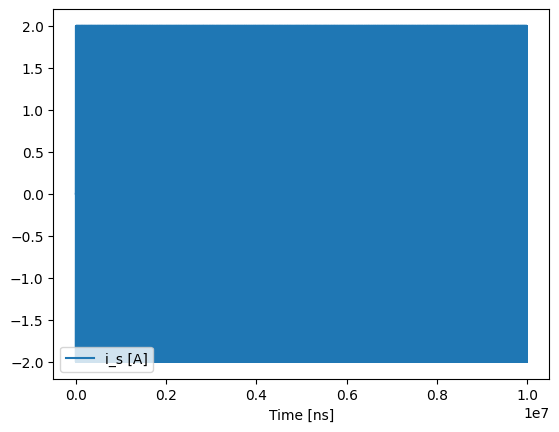

In [42]:
plt.plot(t*1e9, i_C, label="i_s [A]")

plt.xlabel("Time [ns]")
plt.legend()
plt.show()